In [1]:
import tensorflow as tf
from tensorflow import keras as ks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
import os
from tqdm import tqdm
import cv2
from os import listdir
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


In [2]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

In [3]:
directory = "../input/opencv-facial-recognition-lbph/yalefaces/"

In [4]:
directory_train='../input/opencv-facial-recognition-lbph/yalefaces/train/'

filenames = pd.DataFrame(list_files(directory_train, "subject"))

data = filenames[0].str.split(".", expand=True)
data["filename"] = filenames

data = data.rename(columns = {0:"subject", 1:"category"})
data['subject'] = data.subject.str.replace('subject' , '')
data.apply(pd.to_numeric, errors='coerce').dropna()
data['subject'] = pd.to_numeric(data["subject"])


In [5]:
directory_test='../input/opencv-facial-recognition-lbph/yalefaces/test/'
filenames = pd.DataFrame(list_files(directory_test, "subject"))

datatest = filenames[0].str.split(".", expand=True)
datatest["filename"] = filenames

datatest = datatest.rename(columns = {0:"subject", 1:"category"})
datatest['subject'] = datatest.subject.str.replace('subject' , '')
datatest.apply(pd.to_numeric, errors='coerce').dropna()
datatest['subject'] = pd.to_numeric(datatest["subject"])

In [6]:
data.head()

,subject,category,2,filename
0,15,happy,gif,subject15.happy.gif
1,13,noglasses,gif,subject13.noglasses.gif
2,1,normal,gif,subject01.normal.gif
3,15,surprised,gif,subject15.surprised.gif
4,14,wink,gif,subject14.wink.gif


In [7]:
data.head()

,subject,category,2,filename
0,15,happy,gif,subject15.happy.gif
1,13,noglasses,gif,subject13.noglasses.gif
2,1,normal,gif,subject01.normal.gif
3,15,surprised,gif,subject15.surprised.gif
4,14,wink,gif,subject14.wink.gif


In [8]:
data=data.drop(2, axis=1)

In [9]:
data["category"].unique()

array(['happy', 'noglasses', 'normal', 'surprised', 'wink', 'sleepy',
       'glasses', 'sad', 'rightlight', 'leftlight', 'centerlight'],
      dtype=object)

In [10]:
data["subject"].unique()

array([15, 13,  1, 14, 11,  6, 12,  2,  3, 10,  8,  7,  5,  9,  4])

(243, 320, 3)


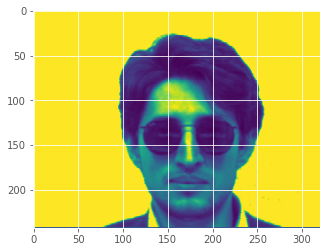

In [11]:
filename = "../input/opencv-facial-recognition-lbph/yalefaces/test/subject03.glasses.gif"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [12]:
# path = '../input/opencv-facial-recognition-lbph/yalefaces/train'
# fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 10))
# ax = [ax1, ax2, ax3, ax4]
# for i in range(4):
#     img = mpimg.imread(path+data['filename'])
#     ax[i].imshow(img)
#     ax[i].set_title(data['Name'][i**3])
#     ax[i].axis('off')
# plt.tight_layout()
# plt.show()